In [1]:
#Importing the important Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [2]:
df=yf.Ticker("TSLA")

In [3]:
df=df.history(period="max")

In [4]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [5]:
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-08-22 00:00:00-04:00,240.250000,240.820007,229.550003,233.190002,130597900,0.0,0.0
2023-08-23 00:00:00-04:00,229.339996,238.979996,229.289993,236.860001,101077600,0.0,0.0
2023-08-24 00:00:00-04:00,238.660004,238.919998,228.179993,230.039993,99777400,0.0,0.0
2023-08-25 00:00:00-04:00,231.309998,239.000000,230.350006,238.589996,106345900,0.0,0.0
2023-08-28 00:00:00-04:00,242.580002,244.380005,235.350006,238.820007,107463700,0.0,0.0


In [6]:
df=df.reset_index()

In [7]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [8]:
df=df.drop(columns=["Date","Dividends","Stock Splits"])

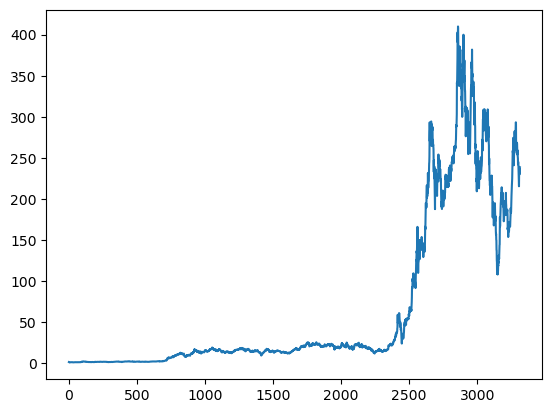

In [9]:
plt.plot(df.Close)

In [10]:
ma100=df.Close.rolling(100).mean()

In [11]:
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
3309    221.276700
3310    221.692500
3311    221.918300
3312    222.356499
3313    222.818900
Name: Close, Length: 3314, dtype: float64

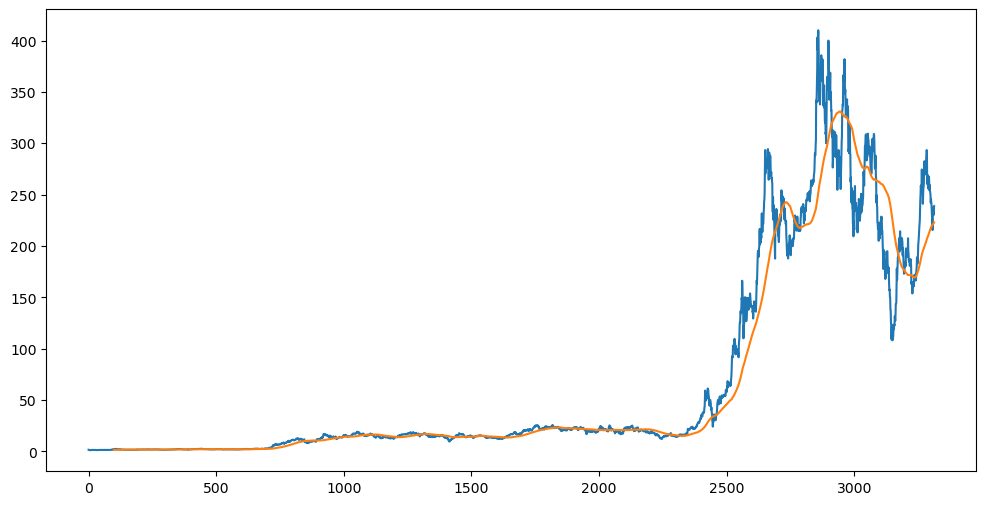

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [13]:
ma200=df.Close.rolling(200).mean()

In [14]:
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3309    196.63180
3310    196.73955
3311    196.85240
3312    197.05995
3313    197.29755
Name: Close, Length: 3314, dtype: float64

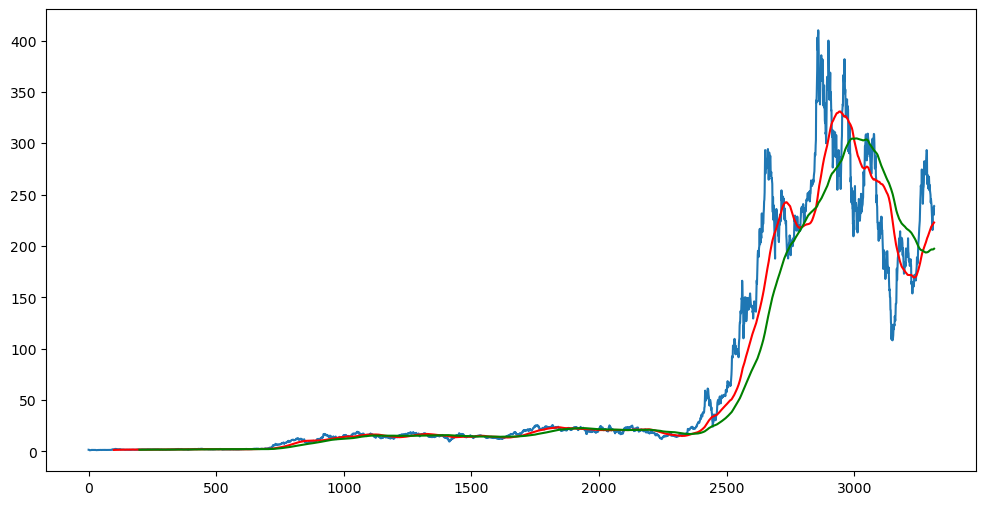

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')



In [16]:
df.shape

(3314, 5)

In [17]:
#Splitting the data into training and testing
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df["Close"][int(len(df)*0.7):int(len(df))])
print(data_training.shape)
print(data_testing.shape)

(2319, 1)
(995, 1)


In [18]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [19]:
data_training_array=scaler.fit_transform(data_training)

In [71]:
scaler.scale_

array([106.77136012])

In [20]:
data_training_array.shape

(2319, 1)

In [21]:
X_train=[]
y_train=[]
for i in range(100,data_training.shape[0]):
    X_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)


X_train.shape

(2219, 100, 1)

In [22]:
#Importing the important libraries
import tensorflow
from tensorflow import keras
from keras import Sequential,layers

In [25]:
model = Sequential([
layers.LSTM(units=50, activation="relu", return_sequences=True, input_shape=(X_train.shape[1], 1)),
layers.Dropout(0.2),
layers.LSTM(units=80, activation="relu", return_sequences=True),
layers.Dropout(0.2),
layers.LSTM(units=150, activation="relu"),
layers.Dropout(0.4),
layers.Dense(units=1),
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_3 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_4 (LSTM)               (None, 100, 80)           41920     
                                                                 
 dropout_4 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_5 (LSTM)               (None, 150)               138600    
                                                                 
 dropout_5 (Dropout)         (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [24]:
pip install tensorflow ==2.12.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '==2.12.0'


In [26]:
model.compile(optimizer="adam",loss="mean_squared_error")
model.fit(X_train,y_train,epochs=50)

Epoch 1/50
70/70 [==============================] - 10s 111ms/step - loss: 0.1375
Epoch 2/50
70/70 [==============================] - 8s 113ms/step - loss: 0.0402
Epoch 3/50
70/70 [==============================] - 8s 114ms/step - loss: 0.0359
Epoch 4/50
70/70 [==============================] - 8s 114ms/step - loss: 0.0322
Epoch 5/50
70/70 [==============================] - 8s 116ms/step - loss: 0.0307
Epoch 6/50
70/70 [==============================] - 9s 125ms/step - loss: 0.0322
Epoch 7/50
70/70 [==============================] - 9s 126ms/step - loss: 0.0294
Epoch 8/50
70/70 [==============================] - 9s 130ms/step - loss: 0.0269
Epoch 9/50
70/70 [==============================] - 9s 126ms/step - loss: 0.0271
Epoch 10/50
70/70 [==============================] - 9s 123ms/step - loss: 0.0268
Epoch 11/50
70/70 [==============================] - 9s 125ms/step - loss: 0.0253
Epoch 12/50
70/70 [==============================] - 9s 124ms/step - loss: 0.0257
Epoch 13/50
70/70 [=====

In [27]:
model.save('keras_model.h5')

C:\ProgramData\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [28]:
data_testing.head()

,Close
2319,16.187332
2320,16.319332
2321,16.232668
2322,16.440001
2323,16.041332


In [29]:
past_100_days=data_training.tail(100)

In [30]:
final_df=past_100_days.append(data_testing,ignore_index=True)

C:\Users\Dhruv Sanghvi\AppData\Local\Temp\ipykernel_17272\3595571042.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df=past_100_days.append(data_testing,ignore_index=True)


In [31]:
final_df.head()

,Close
0,17.243999
1,16.508667
2,15.676000
3,16.098000
4,15.912667


In [87]:
input_data=scaler.fit_transform(final_df)

In [88]:
input_data

array([[-1.48564746],
       [-1.49253444],
       [-1.50033305],
       ...,
       [ 0.50735884],
       [ 0.58743652],
       [ 0.58959076]])

In [89]:
input_data.shape

(1095, 1)

In [90]:
X_test=[]
y_test=[]
for i in range(100,input_data.shape[0]):
    X_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])   
    
    

In [91]:
X_test, y_test=np.array(X_test),np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(995, 100, 1)
(995,)


In [110]:
#Making Predictions
y_predicted=model.predict(X_test)

32/32 [==============================] - 1s 33ms/step


In [111]:
y_predicted.shape

(995, 1)

In [112]:
y_predicted

array([[-1.35824943e+00],
       [-1.35786986e+00],
       [-1.35753751e+00],
       [-1.35725021e+00],
       [-1.35699165e+00],
       [-1.35678124e+00],
       [-1.35663331e+00],
       [-1.35662031e+00],
       [-1.35674787e+00],
       [-1.35685587e+00],
       [-1.35686660e+00],
       [-1.35682321e+00],
       [-1.35674751e+00],
       [-1.35665786e+00],
       [-1.35663199e+00],
       [-1.35670555e+00],
       [-1.35681772e+00],
       [-1.35689712e+00],
       [-1.35691309e+00],
       [-1.35687196e+00],
       [-1.35678601e+00],
       [-1.35662353e+00],
       [-1.35638189e+00],
       [-1.35609674e+00],
       [-1.35579073e+00],
       [-1.35551357e+00],
       [-1.35531569e+00],
       [-1.35518587e+00],
       [-1.35509717e+00],
       [-1.35478258e+00],
       [-1.35397100e+00],
       [-1.35275888e+00],
       [-1.35147023e+00],
       [-1.35031140e+00],
       [-1.34932792e+00],
       [-1.34851718e+00],
       [-1.34782958e+00],
       [-1.34723103e+00],
       [-1.3

In [113]:
scaler.scale_

array([106.77136012])

In [114]:
scale_factor=1/scaler.scale_[0]

In [115]:
scale_factor

0.00936580744927266

In [116]:
y_predicted=y_predicted*scale_factor

In [117]:
y_predicted

array([[-1.27211027e-02],
       [-1.27175478e-02],
       [-1.27144344e-02],
       [-1.27117438e-02],
       [-1.27093224e-02],
       [-1.27073517e-02],
       [-1.27059659e-02],
       [-1.27058448e-02],
       [-1.27070388e-02],
       [-1.27080502e-02],
       [-1.27081508e-02],
       [-1.27077447e-02],
       [-1.27070360e-02],
       [-1.27061959e-02],
       [-1.27059538e-02],
       [-1.27066430e-02],
       [-1.27076935e-02],
       [-1.27084367e-02],
       [-1.27085866e-02],
       [-1.27082011e-02],
       [-1.27073964e-02],
       [-1.27058746e-02],
       [-1.27036115e-02],
       [-1.27009405e-02],
       [-1.26980748e-02],
       [-1.26954792e-02],
       [-1.26936259e-02],
       [-1.26924096e-02],
       [-1.26915788e-02],
       [-1.26886321e-02],
       [-1.26810316e-02],
       [-1.26696788e-02],
       [-1.26576098e-02],
       [-1.26467561e-02],
       [-1.26375454e-02],
       [-1.26299523e-02],
       [-1.26235122e-02],
       [-1.26179066e-02],
       [-1.2

In [100]:
y_test=y_test*scale_factor

In [101]:
y_test

array([-1.40069772e-02, -1.39953984e-02, -1.40030004e-02, -1.39848135e-02,
       -1.40197841e-02, -1.40162167e-02, -1.41215957e-02, -1.40894908e-02,
       -1.40084390e-02, -1.40109536e-02, -1.40183219e-02, -1.39959829e-02,
       -1.40051057e-02, -1.40641695e-02, -1.40735260e-02, -1.40367429e-02,
       -1.40231174e-02, -1.39969187e-02, -1.39956907e-02, -1.39772699e-02,
       -1.39242294e-02, -1.39187909e-02, -1.39079137e-02, -1.38949315e-02,
       -1.39242880e-02, -1.39444632e-02, -1.39322994e-02, -1.39375627e-02,
       -1.36744076e-02, -1.35080351e-02, -1.35104912e-02, -1.35776835e-02,
       -1.35847593e-02, -1.35852857e-02, -1.35947009e-02, -1.35703736e-02,
       -1.35718355e-02, -1.35170994e-02, -1.34647022e-02, -1.34553456e-02,
       -1.34088548e-02, -1.33805511e-02, -1.34028901e-02, -1.33839428e-02,
       -1.33674518e-02, -1.33802003e-02, -1.33244698e-02, -1.33671595e-02,
       -1.33518965e-02, -1.34793219e-02, -1.34600239e-02, -1.35034153e-02,
       -1.34895557e-02, -

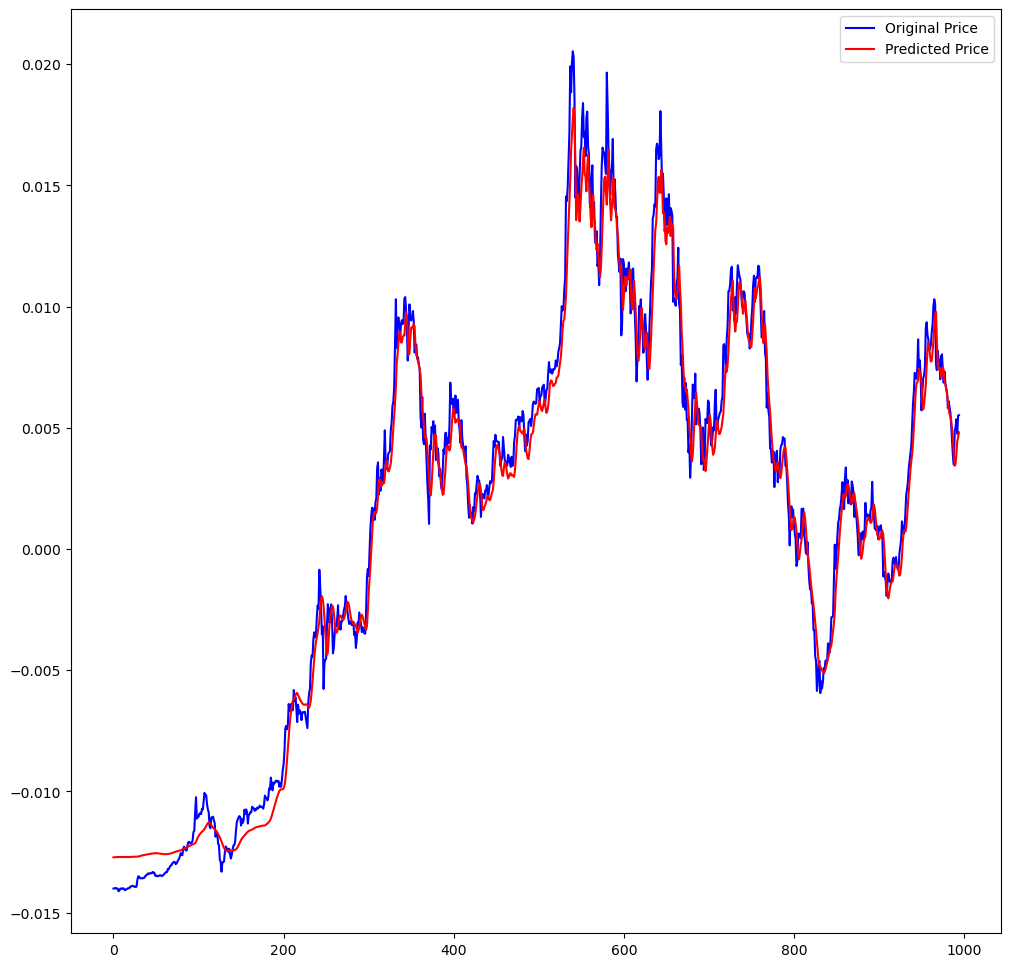

In [105]:
plt.figure(figsize=(12,12))
plt.plot(y_test,'b',label="Original Price")
plt.plot(y_predicted, 'r',label="Predicted Price")
plt.legend()
plt.show()
